In [ ]:
# Installing tensorflow-gpu
!pip install tensorflow-gpu


     |████████████████████████████████| 394.3MB 43kB/s 


In [ ]:
#Checking which gpu is allocated
!nvidia-smi

Thu Mar  4 06:10:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Checking tensorflow version
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
#Checking kears version
tf.keras.__version__

'2.4.0'

In [ ]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
#importing libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from tensorflow import keras
#import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Data sets/Cotton disease/train'
test_path = '/content/drive/MyDrive/Data sets/Cotton disease/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Data sets/Cotton disease/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data sets/Cotton disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data sets/Cotton disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Data sets/Cotton disease/models/Model-4.h5',save_best_only=True)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
callbacks=[checkpoint_cb]
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 651s 10s/step - loss: 2.3421 - accuracy: 0.6613 - val_loss: 0.4393 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 35s 572ms/step - loss: 0.8012 - accuracy: 0.8594 - val_loss: 0.0514 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 35s 571ms/step - loss: 0.5571 - accuracy: 0.9040 - val_loss: 0.2004 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 35s 569ms/step - loss: 0.5153 - accuracy: 0.9110 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 35s 570ms/step - loss: 0.4951 - accuracy: 0.9201 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 35s 571ms/step - loss: 0.5414 - accuracy: 0.9139 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 35s 568ms/step - loss: 0.3278 - accuracy: 0.9470 - val_loss: 0.0479 - val_accuracy: 0.9444


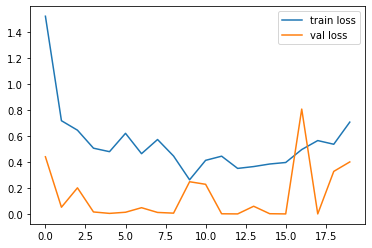

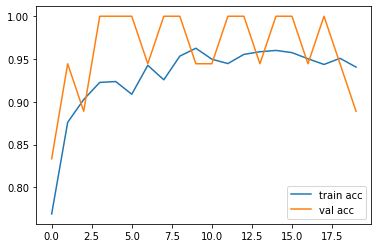

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save("/content/drive/MyDrive/Data sets/Cotton disease/models/model_2.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
img=image.load_img('/content/drive/MyDrive/Data sets/Cotton disease/test/fresh cotton leaf/d (366).jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape


In [ ]:
x=x/255


In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model=load_model('Model-3.h5')
model.predict(img_data)


In [ ]:
preds=np.argmax(model.predict(img_data), axis=1)
if preds==0:
  preds="The leaf is diseased cotton leaf"
elif preds==1:
  preds="The leaf is diseased cotton plant"
elif preds==2:
  preds="The leaf is fresh cotton leaf"
else:
  preds="The leaf is fresh cotton plant"
preds